# Introduction

With standard of living rising all over the world and more people moving to cities, buildings are getting taller and taller. Not only do skyscrapers provide retail, office, and living spaces for people, some have even become attractions being known for the height. This project seeks to answer several main questions about skyscraper and their locations. What building type allows for more height? And does the demographic of the state/county (such as median household income, per capita income, land area, mean travel time to work, etc.) correpsond to the number of skyscrapers developed in a specific county? 

This project will ultilize two main datasets provided by CORGIS: skyscraper and state/county demographics. 

**Skyscraper Data Set**

https://corgis-edu.github.io/corgis/csv/skyscrapers/
* The skyscraper data includes information on the location of the skyscraper, the material it is built, the year constructed, year completed, purpose of the building, and height.

**County/State Demographics Data Set**

https://corgis-edu.github.io/corgis/csv/county_demographics/

https://corgis-edu.github.io/corgis/csv/state_demographics/
* The county and state data set includes information on the state/county and information on population. Some useful for this project would be: household median income, per capita income, land area, mean travel time to work, 2020 population,and population per square mile.





# Exploration of Data Set

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

In [2]:
state_dem_og = pd.read_csv('https://corgis-edu.github.io/corgis/datasets/csv/state_demographics/state_demographics.csv')
county_dem_og = pd.read_csv('https://corgis-edu.github.io/corgis/datasets/csv/county_demographics/county_demographics.csv')
sky_og = pd.read_csv('https://corgis-edu.github.io/corgis/datasets/csv/skyscrapers/skyscrapers.csv')

In [3]:
sky_og

,id,material,name,location.city,location.city_id,location.country,location.country id,location.latitude,location.longitude,purposes.abandoned,...,purposes.telecommunications,statistics.floors above,statistics.height,statistics.number of purposes,statistics.rank,status.current,status.completed.is completed,status.completed.year,status.started.is started,status.started.year
0,12,steel,The Illinois,Chicago,1539,US,163,0.000000,0.000000,True,...,True,528,1609.359985,4,1,vision,True,0,True,0
1,62,composite,Chicago Spire,Chicago,1539,US,163,41.889889,-87.614861,True,...,True,150,609.599976,1,2,never completed,True,0,True,2007
2,68,composite,Miglin-Beitler Skyneedle,Chicago,1539,US,163,41.881618,-87.634354,True,...,True,125,609.489990,1,3,vision,True,0,True,0
3,98,composite,One World Trade Center,New York City,1641,US,163,40.713112,-74.013351,True,...,True,94,541.299988,1,4,completed,True,2014,True,2006
4,14269,concrete,Central Park Tower,New York City,1641,US,163,40.766361,-73.980949,True,...,True,95,541.020020,3,5,under construction,True,2019,True,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2426,18633,concrete,Hallets Point 2,New York City,1641,US,163,0.000000,0.000000,True,...,True,0,0.000000,1,2423,proposed,True,0,True,0
2427,18635,concrete,Hallets Point 3,New York City,1641,US,163,0.000000,0.000000,True,...,True,0,0.000000,1,2423,proposed,True,0,True,0
2428,18636,concrete,Hallets Point 4,New York City,1641,US,163,0.000000,0.000000,True,...,True,0,0.000000,1,2423,proposed,True,0,True,0
2429,18637,concrete,Hallets Point 5,New York City,1641,US,163,0.000000,0.000000,True,...,True,0,0.000000,1,2423,proposed,True,0,True,0


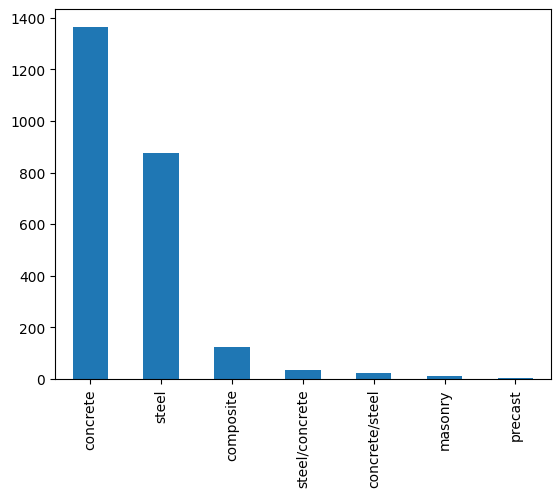

In [4]:
material= sky_og['material'].value_counts()
material.plot(kind='bar')
plt.show()

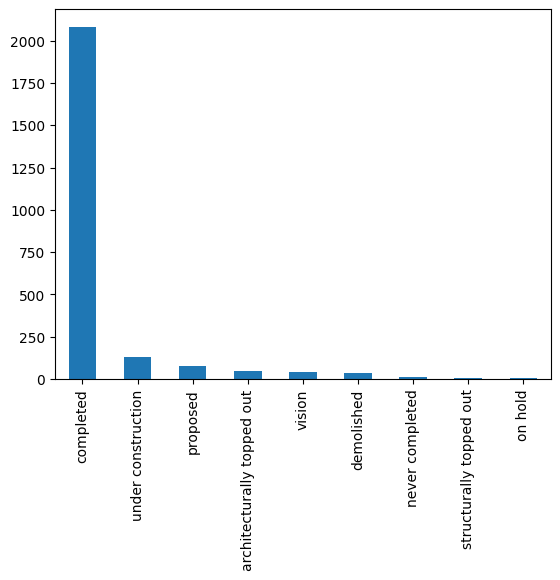

In [5]:
material= sky_og['status.current'].value_counts()
material.plot(kind='bar')
plt.show()

In [6]:
sky_fix = (sky_og['status.current'] != 'proposed') & (sky_og['status.current'] != 'vision') & (sky_og['status.current'] != 'never completed') & (sky_og['status.current'] != 'achitercturally topped out') & (sky_og['status.current'] != 'demolished') & (sky_og['status.current'] != 'structurally topped out')& (sky_og['status.current'] != 'on hold')&(sky_og['statistics.height'] != '0.000000')
sky = sky_og[sky_fix]

In [7]:
sky

,id,material,name,location.city,location.city_id,location.country,location.country id,location.latitude,location.longitude,purposes.abandoned,...,purposes.telecommunications,statistics.floors above,statistics.height,statistics.number of purposes,statistics.rank,status.current,status.completed.is completed,status.completed.year,status.started.is started,status.started.year
3,98,composite,One World Trade Center,New York City,1641,US,163,40.713112,-74.013351,True,...,True,94,541.299988,1,4,completed,True,2014,True,2006
4,14269,concrete,Central Park Tower,New York City,1641,US,163,40.766361,-73.980949,True,...,True,95,541.020020,3,5,under construction,True,2019,True,2014
7,169,steel,Willis Tower,Chicago,1539,US,163,41.878868,-87.635948,True,...,True,108,442.140015,1,8,completed,True,1974,True,1970
8,14320,concrete,111 West 57th Street,New York City,1641,US,163,40.764801,-73.977547,True,...,True,80,438.299988,1,9,under construction,True,2018,True,2015
10,13227,concrete,432 Park Avenue,New York City,1641,US,163,40.761559,-73.971863,True,...,True,85,425.500000,1,11,completed,True,2015,True,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2419,18244,steel,Ohio Public Employees Retirement System,Columbus,1545,US,163,39.959309,-82.992310,True,...,True,13,0.000000,1,2420,completed,True,2004,True,2000
2420,16874,concrete,My Micro NY,New York City,1641,US,163,40.739868,-73.977379,True,...,True,10,0.000000,2,2421,completed,True,2015,True,2014
2421,20056,steel,United States Courthouse ?Salt Lake City,Salt Lake City,1687,US,163,40.768291,-111.901192,True,...,True,10,0.000000,1,2421,completed,True,2014,True,0
2422,19440,concrete,"1047 Amsterdam Avenue, East Tower",New York City,1641,US,163,40.803940,-73.960930,True,...,True,0,0.000000,1,2423,under construction,True,0,True,2014


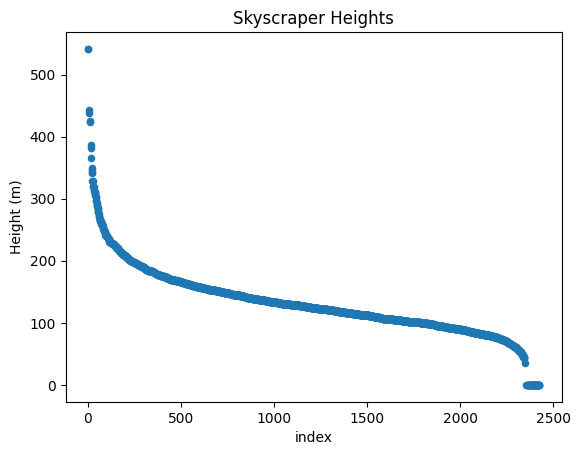

In [8]:
height = pd.DataFrame({'height': sky['statistics.height'], 'index': sky.index})
height.plot(kind='scatter', x='index', y='height')

plt.title('Skyscraper Heights')
plt.ylabel('Height (m)')
plt.show()

In [9]:
state_dem_og.head()

,State,Population.Population Percent Change,Population.2014 Population,Population.2010 Population,Age.Percent Under 5 Years,Age.Percent Under 18 Years,Age.Percent 65 and Older,Miscellaneous.Percent Female,Ethnicities.White Alone,Ethnicities.Black Alone,...,Employment.Nonemployer Establishments,Employment.Firms.Total,Employment.Firms.Men-Owned,Employment.Firms.Women-Owned,Employment.Firms.Minority-Owned,Employment.Firms.Nonminority-Owned,Employment.Firms.Veteran-Owned,Employment.Firms.Nonveteran-Owned,Population.Population per Square Mile,Miscellaneous.Land Area
0,Connecticut,-10.2,3605944,3574097,5.1,20.4,17.7,51.2,79.7,12.2,...,286874,326693,187845,106678,56113,259614,31056,281182,738.1,4842.36
1,Delaware,8.4,989948,897934,5.6,20.9,19.4,51.7,69.2,23.2,...,68623,73418,38328,23964,14440,54782,7206,60318,460.8,1948.54
2,District of Columbia,17.3,689545,601723,6.4,18.2,12.4,52.6,46.0,46.0,...,62583,63408,30237,27064,29983,29521,5070,54217,9856.5,61.05
3,Florida,14.2,21538187,18801310,5.3,19.7,20.9,51.1,77.3,16.9,...,2388050,2100187,1084885,807817,926112,1121749,185756,1846686,350.6,53624.76
4,Georgia,9.6,10711908,9687653,6.2,23.6,14.3,51.4,60.2,32.6,...,955621,929864,480578,376506,371588,538893,96787,800585,168.4,57513.49


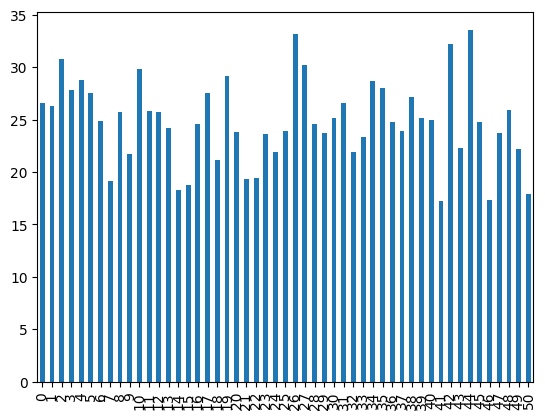

In [10]:
travel = state_dem_og['Miscellaneous.Mean Travel Time to Work']
travel.plot(kind='bar', x='State')
plt.show()

In [11]:
dem_fix = (state_dem_og['State'] != 'District of Columbia')   
state_dem = state_dem_og[dem_fix]

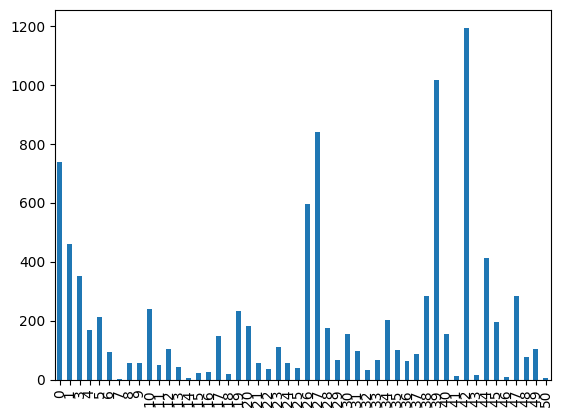

In [12]:
travel = state_dem['Population.Population per Square Mile']
travel.plot(kind='bar', x='State')
plt.show()

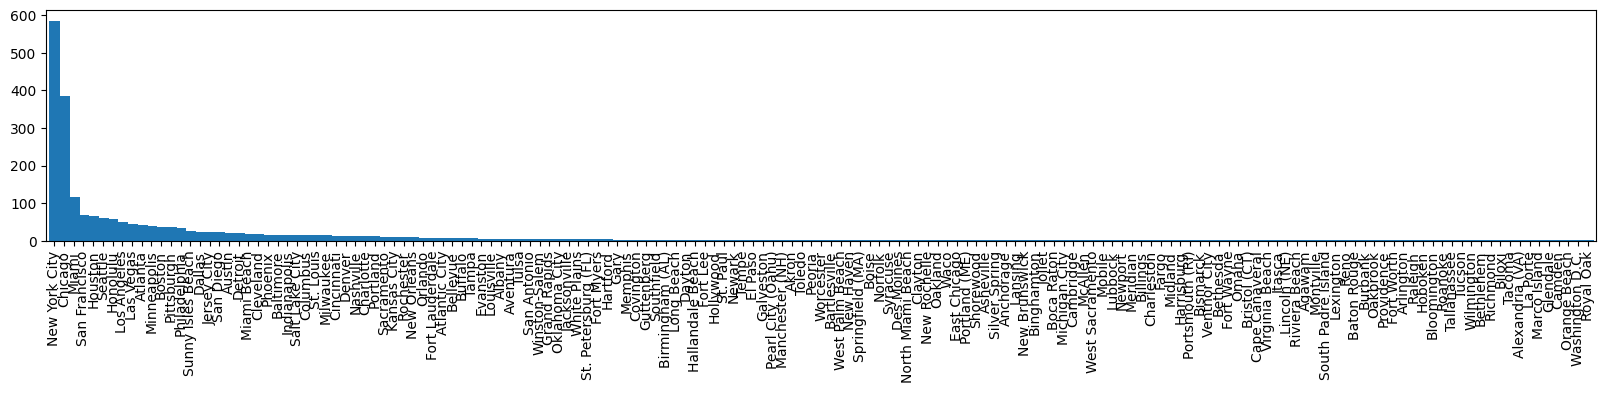

In [13]:
cities = sky['location.city'].value_counts()
cities.plot(kind='bar', width=1.2, figsize=(20,3))
plt.show()

In [14]:
sky.loc[sky['location.city'].isin(['Miami', 'Miami Beach', 'Sunny Isles Beach']), 'location.city'] = 'Miami Area'
top_cities = sky['location.city'].value_counts().nlargest(35)
top_cities

New York City     586
Chicago           385
Miami Area        160
San Francisco      67
Houston            66
Seattle            61
Honolulu           59
Los Angeles        51
Las Vegas          45
Atlanta            42
Minneapolis        39
Boston             37
Pittsburgh         37
Philadelphia       35
Jersey City        23
San Diego          23
Dallas             23
Austin             21
Detroit            20
Cleveland          17
Baltimore          16
Indianapolis       16
Phoenix            16
St. Louis          15
Salt Lake City     15
Columbus           15
Milwaukee          14
Cincinnati         13
Denver             12
Nashville          12
Portland           12
Charlotte          12
Sacramento         11
Kansas City        11
New Orleans         9
Name: location.city, dtype: int64

# Analysis

In [15]:
cities_states = {
    'New York': ['New York City'],
    'Illinois': ['Chicago'],
    'Florida': ['Miami Area'],
    'California': ['San Francisco', 'Los Angeles', 'San Diego', 'Sacramento'],
    'Texas': ['Houston', 'Dallas', 'Austin'],
    'Hawaii': ['Honolulu'],
    'Nevada': ['Las Vegas'],
    'Minnesota': ['Minneapolis'],
    'Pennsylvania': ['Pittsburgh', 'Philadelphia'],
    'Georgia': ['Atlanta'],
    'Massachusetts': ['Boston'],
    'Ohio': ['Cleveland', 'Columbus'],
    'Arizona': ['Phoenix'],
    'Maryland': ['Baltimore'],
    'Indiana': ['Indianapolis'],
    'Utah': ['Salt Lake City'],
    'Missouri': ['St. Louis', 'Kansas City'],
    'Wisconsin': ['Milwaukee'],
    'Michigan': ['Detroit'],
    'North Carolina': ['Charlotte'],
    'Tennessee': ['Nashville'],
    'Oregon': ['Portland'],
    'Colorado': ['Denver'],
    'Louisiana':['New Orleans']
}

In [16]:
grouped_cities = {}
for city, count in top_cities.items():
    for state, cities in cities_states.items():
        if city in cities:
            if state in grouped_cities:
                grouped_cities[state] += count
            else:
                grouped_cities[state] = count
            break
grouped_cities

{'New York': 586,
 'Illinois': 385,
 'Florida': 160,
 'California': 152,
 'Texas': 110,
 'Hawaii': 59,
 'Nevada': 45,
 'Georgia': 42,
 'Minnesota': 39,
 'Massachusetts': 37,
 'Pennsylvania': 72,
 'Michigan': 20,
 'Ohio': 32,
 'Maryland': 16,
 'Indiana': 16,
 'Arizona': 16,
 'Missouri': 26,
 'Utah': 15,
 'Wisconsin': 14,
 'Colorado': 12,
 'Tennessee': 12,
 'Oregon': 12,
 'North Carolina': 12,
 'Louisiana': 9}

In [17]:
top_states = ((state_dem['State'] == 'New York')
              | (state_dem['State'] == 'Illinois') 
              | (state_dem['State'] == 'Florida')
              | (state_dem['State'] == 'California')
              | (state_dem['State'] == 'Texas')
              | (state_dem['State'] == 'Hawaii')
              | (state_dem['State'] == 'Nevada')
              | (state_dem['State'] == 'Georgia')
              | (state_dem['State'] == 'Minnesota')
              | (state_dem['State'] == 'Massachusetts')
              | (state_dem['State'] == 'Pennsylvania')
              | (state_dem['State'] == 'Michigan')
              | (state_dem['State'] == 'Ohio')
              | (state_dem['State'] == 'Arizona')
              | (state_dem['State'] == 'Maryland')
              | (state_dem['State'] == 'Indiana')
              | (state_dem['State'] == 'Utah')
              | (state_dem['State'] == 'Wisconsin')
              | (state_dem['State'] == 'Colorado')
              | (state_dem['State'] == 'Tennessee')
              | (state_dem['State'] == 'North Carolina')
              | (state_dem['State'] == 'Louisiana'))
top_dem = state_dem[top_states]

In [18]:
cities_states_df = pd.DataFrame(grouped_cities.items(), columns=['State', 'Skyscraper'])
merged_df = pd.merge(state_dem, cities_states_df, on='State')

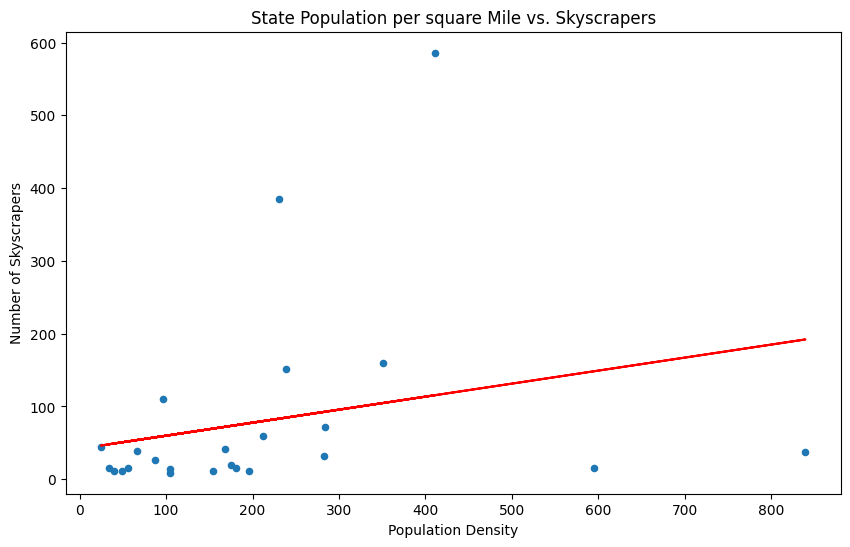

In [19]:
merged_df.plot(kind='scatter', x='Population.Population per Square Mile', y='Skyscraper', figsize=(10, 6))

x = merged_df['Population.Population per Square Mile']
y = merged_df['Skyscraper']
slope, intercept = np.polyfit(x, y, 1)
line = slope * x + intercept
plt.plot(x, line, color='red')

plt.title('State Population per square Mile vs. Skyscrapers')
plt.xlabel('Population Density')
plt.ylabel('Number of Skyscrapers')
plt.show()

In [20]:
cities_county = {
    'New York': ['New York City'],
    'Illinois': ['Chicago'],
    'Florida': ['Miami Area'],
    'California': ['San Francisco', 'Los Angeles', 'San Diego', 'Sacramento'],
    'Texas': ['Houston', 'Dallas', 'Austin'],
    'Hawaii': ['Honolulu'],
    'Nevada': ['Las Vegas'],
    'Minnesota': ['Minneapolis'],
    'Pennsylvania': ['Pittsburgh', 'Philadelphia'],
    'Georgia': ['Atlanta'],
    'Massachusetts': ['Boston'],
    'Ohio': ['Cleveland', 'Columbus'],
    'Arizona': ['Phoenix'],
    'Maryland': ['Baltimore'],
    'Indiana': ['Indianapolis'],
    'Utah': ['Salt Lake City'],
    'Missouri': ['St. Louis', 'Kansas City'],
    'Wisconsin': ['Milwaukee'],
    'Michigan': ['Detroit'],
    'North Carolina': ['Charlotte'],
    'Tennessee': ['Nashville'],
    'Oregon': ['Portland'],
    'Colorado': ['Denver'],
    'Louisiana':['New Orleans']
}

In [21]:
county_dem_og.head()

,County,State,Age.Percent 65 and Older,Age.Percent Under 18 Years,Age.Percent Under 5 Years,Education.Bachelor's Degree or Higher,Education.High School or Higher,Employment.Nonemployer Establishments,Ethnicities.American Indian and Alaska Native Alone,Ethnicities.Asian Alone,...,Population.Population per Square Mile,Sales.Accommodation and Food Services Sales,Sales.Retail Sales,Employment.Firms.Total,Employment.Firms.Women-Owned,Employment.Firms.Men-Owned,Employment.Firms.Minority-Owned,Employment.Firms.Nonminority-Owned,Employment.Firms.Veteran-Owned,Employment.Firms.Nonveteran-Owned
0,Abbeville County,SC,22.4,19.8,4.7,15.6,81.7,1416,0.3,0.4,...,51.8,12507,91371,1450,543,689,317,1080,187,1211
1,Acadia Parish,LA,15.8,25.8,6.9,13.3,79.0,4533,0.4,0.3,...,94.3,52706,602739,4664,1516,2629,705,3734,388,4007
2,Accomack County,VA,24.6,20.7,5.6,19.5,81.5,2387,0.7,0.8,...,73.8,53568,348195,2997,802,1716,335,2560,212,2536
3,Ada County,ID,14.9,23.2,5.6,38.5,95.2,41464,0.8,2.7,...,372.8,763099,5766679,41789,14661,19409,3099,36701,3803,35132
4,Adair County,IA,23.0,21.8,5.6,18.5,94.2,609,0.3,0.5,...,13.5,-1,63002,914,304,499,0,861,185,679


In [22]:
cities_county = {
    'New York County': 'New York City',
    'Kings County': 'New York City',
    'Bronx County': 'New York City',
    'Richmond County': 'New York City',
    'Queens County': 'New York City',
    'Cook County': 'Chicago',
    'Miami-Dade County': 'Miami Area',
    'San Francisco County': 'San Francisco',
    'Los Angeles County': 'Los Angeles',
    'San Diego County': 'San Diego',
    'Sacramento County': 'Sacramento',
    'Harris County': 'Houston',
    'Fort Bend County': 'Houston',
    'Montgomery County': 'Houston',
    'Dallas County': 'Dallas',
    'Collin County': 'Dallas',
    'Denton County': 'Dallas',
    'Kaufman County': 'Dallas',
    'Rockwall County': 'Dallas',
    'Travis County': 'Austin',
    'Hays County': 'Austin',
    'Williamson County': 'Austin',
    'Honolulu County': 'Honolulu',
    'Clark County': 'Las Vegas',
    'Hennepin County': 'Minneapolis',
    'Allegheny County':'Pittsburgh',
    'Philadelphia County': 'Philadelphia',
    'Fulton County': 'Atlanta',
    'DeKalb County': 'Atlanta',
    'Suffolk County': 'Boston',
    'Cuyahoga County': 'Cleveland',
    'Franklin County': 'Columbus',
    'Delaware County': 'Columbus',
    'Maricopa County': 'Phoenix',
    'Baltimore city': 'Baltimore',
    'Marion County': 'Indianapolis',
    'Salt Lake County': 'Salt Lake City',
    'St. Louis County': 'St. Louis',
    'Milwaukee County': 'Milwaukee',
    'Wayne County': 'Detroit',
    'Mecklenburg County': 'Charlotte',
    'Davidson County': 'Nashville',
    'Multnomah County': 'Portland',
    'Denver County': 'Denver',
    'Jackson County' : 'Kansas City',
    'Orleans Parish':'New Orleans'
}

In [23]:
cities_county_df = pd.DataFrame(cities_county.items(), columns=['County', 'City'])
county_m= pd.merge(county_dem_og, cities_county_df, on='County')

In [24]:
county_m

,County,State,Age.Percent 65 and Older,Age.Percent Under 18 Years,Age.Percent Under 5 Years,Education.Bachelor's Degree or Higher,Education.High School or Higher,Employment.Nonemployer Establishments,Ethnicities.American Indian and Alaska Native Alone,Ethnicities.Asian Alone,...,Sales.Accommodation and Food Services Sales,Sales.Retail Sales,Employment.Firms.Total,Employment.Firms.Women-Owned,Employment.Firms.Men-Owned,Employment.Firms.Minority-Owned,Employment.Firms.Nonminority-Owned,Employment.Firms.Veteran-Owned,Employment.Firms.Nonveteran-Owned,City
0,Allegheny County,PA,19.3,18.6,5.2,41.6,94.6,85700,0.2,4.2,...,2940576,20553747,96501,30671,56123,12104,80217,9916,81176,Pittsburgh
1,Baltimore city,MD,13.6,20.7,6.4,31.9,85.2,-1,0.3,2.6,...,1607810,3647668,50735,24599,21952,27673,20782,4216,43918,Baltimore
2,Bronx County,NY,13.3,24.6,7.1,20.1,72.8,120174,2.9,4.6,...,1005143,6872806,135782,68705,61813,110222,23478,7987,125616,New York City
3,Clark County,AR,16.8,19.0,5.3,26.6,90.0,1326,0.6,0.7,...,41523,273667,1346,392,642,248,973,149,1099,Las Vegas
4,Clark County,ID,19.4,22.0,5.6,12.2,59.8,76,3.1,1.1,...,-1,-1,47,0,33,0,41,0,41,Las Vegas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,Wayne County,UT,22.0,23.9,5.9,23.4,88.4,377,1.2,1.0,...,12758,32083,373,87,232,0,351,0,354,Detroit
180,Wayne County,WV,21.7,20.1,4.9,15.1,79.7,1591,0.3,0.3,...,-1,254945,1938,560,1206,38,1809,379,1433,Detroit
181,Williamson County,IL,19.5,21.7,5.9,24.3,92.3,4188,0.5,1.3,...,123702,1116282,5350,1499,2985,303,4761,463,4499,Austin
182,Williamson County,TN,13.5,26.8,5.9,59.8,95.3,29249,0.3,5.2,...,485174,3968591,25780,7549,14409,1932,22787,2945,21354,Austin


In [25]:
county_fix = ((county_m['State'] == 'PA') & (county_m['County'] == 'Allegheny County') 
              |(county_m['State'] == 'PA') & (county_m['County'] == 'Philadelphia County') 
              |(county_m['State'] == 'NY')&(county_m['County'] == 'New York County')
              |(county_m['State'] == 'NY')&(county_m['County'] == 'Bronx County')
              |(county_m['State'] == 'NY')&(county_m['County'] == 'Kings County')
              |(county_m['State'] == 'NY')&(county_m['County'] == 'Queens County')
              |(county_m['State'] == 'NY')&(county_m['County'] == 'Cook County')
              |(county_m['State'] == 'TX')&(county_m['County'] == 'Harris County')
              |(county_m['State'] == 'TX')&(county_m['County'] == 'Fort Bend County')
              |(county_m['State'] == 'TX')&(county_m['County'] == 'Montgomery County')
              |(county_m['State'] == 'TX')&(county_m['County'] == 'Dallas County')
              |(county_m['State'] == 'TX')&(county_m['County'] == 'Collin County')
              |(county_m['State'] == 'TX')&(county_m['County'] == 'Denton County')
              |(county_m['State'] == 'TX')&(county_m['County'] == 'Kaufman County')
              |(county_m['State'] == 'TX')&(county_m['County'] == 'Rockwall County')
              |(county_m['State'] == 'TX')&(county_m['County'] == 'Travis County')
              |(county_m['State'] == 'TX')&(county_m['County'] == 'Hays County')
              |(county_m['State'] == 'TX')&(county_m['County'] == 'Williamson County')
              |(county_m['State'] == 'CA')&(county_m['County'] == 'Sacramento County')
              |(county_m['State'] == 'CA')&(county_m['County'] == 'Los Angeles County')
              |(county_m['State'] == 'CA')&(county_m['County'] == 'San Francisco County')
              |(county_m['State'] == 'CA')&(county_m['County'] == 'San Diego County')
              |(county_m['State'] == 'FL')&(county_m['County'] == 'Miami-Dade County')
              |(county_m['State'] == 'NC')&(county_m['County'] == 'Mecklenburg County')
              |(county_m['State'] == 'OH')&(county_m['County'] == 'Cuyahoga County')
              |(county_m['State'] == 'OH')&(county_m['County'] == 'Franklin County')
              |(county_m['State'] == 'OH')&(county_m['County'] == 'Delaware County')
              |(county_m['State'] == 'MD')&(county_m['County'] == 'Baltimore city')
              |(county_m['State'] == 'IL')&(county_m['County'] == 'Cook County')
              |(county_m['State'] == 'MO')&(county_m['County'] == 'St. Louis County')
              |(county_m['State'] == 'HI')&(county_m['County'] == 'Honolulu County')
              |(county_m['State'] == 'OR')&(county_m['County'] == 'Multnomah County County')
              |(county_m['State'] == 'NV')&(county_m['County'] == 'Clark County')
              |(county_m['State'] == 'CO')&(county_m['County'] == 'Denver County')
              |(county_m['State'] == 'TN')&(county_m['County'] == 'Davidson County')
              |(county_m['State'] == 'AZ')&(county_m['County'] == 'Maricopa County')
              |(county_m['State'] == 'MN')&(county_m['County'] == 'Hennepin County')
              |(county_m['State'] == 'WI')&(county_m['County'] == 'Milwaukee County')
              |(county_m['State'] == 'MA')&(county_m['County'] == 'Suffolk County')
              |(county_m['State'] == 'GA')&(county_m['County'] == 'Fulton County')
              |(county_m['State'] == 'GA')&(county_m['County'] == 'DeKalb County')
              |(county_m['State'] == 'IN')&(county_m['County'] == 'Marion County')
              |(county_m['State'] == 'UT')&(county_m['County'] == 'Salt Lake County')
              |(county_m['State'] == 'MI')&(county_m['County'] == 'Wayne County')
              |(county_m['State'] == 'MO')&(county_m['County'] == 'Jackson County')
              |(county_m['State'] == 'LA')&(county_m['County'] == 'Orleans Parish'))
              
county_sky = county_m[county_fix]

In [26]:
top_cities_df = pd.DataFrame(top_cities.items(), columns=['City', 'Skyscrapers'])
county_with_sky= pd.merge(county_sky, top_cities_df, on='City')

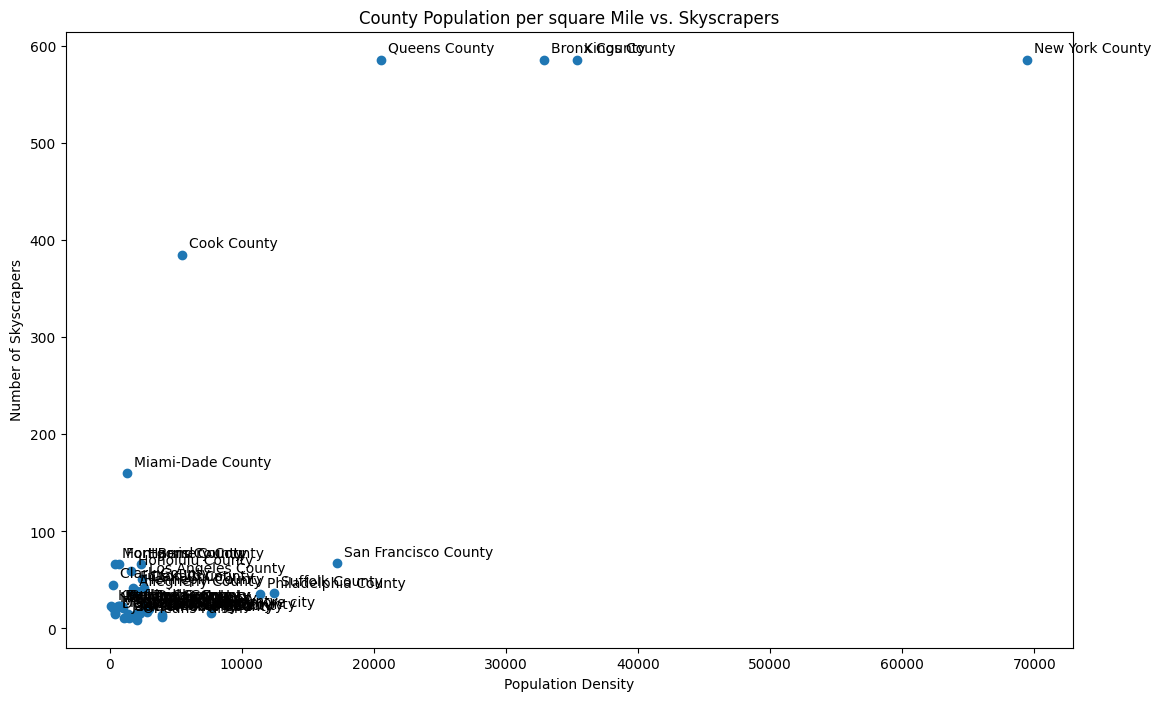

In [27]:
fig, ax = plt.subplots(figsize=(13, 8))

x = county_with_sky['Population.Population per Square Mile']
y = county_with_sky['Skyscrapers']
ax.scatter(x, y)
ax.set_title('County Population per square Mile vs. Skyscrapers')
ax.set_xlabel('Population Density')
ax.set_ylabel('Number of Skyscrapers')
for i, row in county_with_sky.iterrows():
    county = row['County']
    x = row['Population.Population per Square Mile']
    y = row['Skyscrapers']
    ax.annotate(county, xy=(x, y), xytext=(5, 5), textcoords='offset points')
    
plt.show()

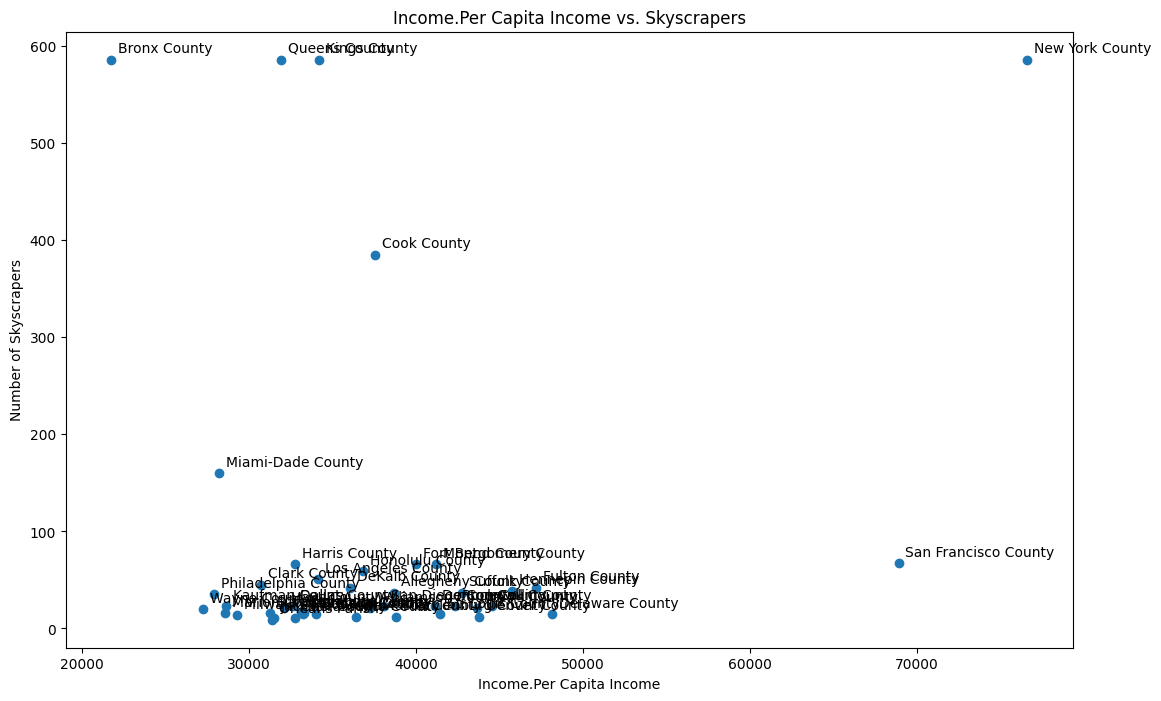

In [28]:
fig, ax = plt.subplots(figsize=(13, 8))

x = county_with_sky['Income.Per Capita Income']
y = county_with_sky['Skyscrapers']
ax.scatter(x, y)
ax.set_title('Income.Per Capita Income vs. Skyscrapers')
ax.set_xlabel('Income.Per Capita Income')
ax.set_ylabel('Number of Skyscrapers')
for i, row in county_with_sky.iterrows():
    county = row['County']
    x = row['Income.Per Capita Income']
    y = row['Skyscrapers']
    ax.annotate(county, xy=(x, y), xytext=(5, 5), textcoords='offset points')
    
plt.show()

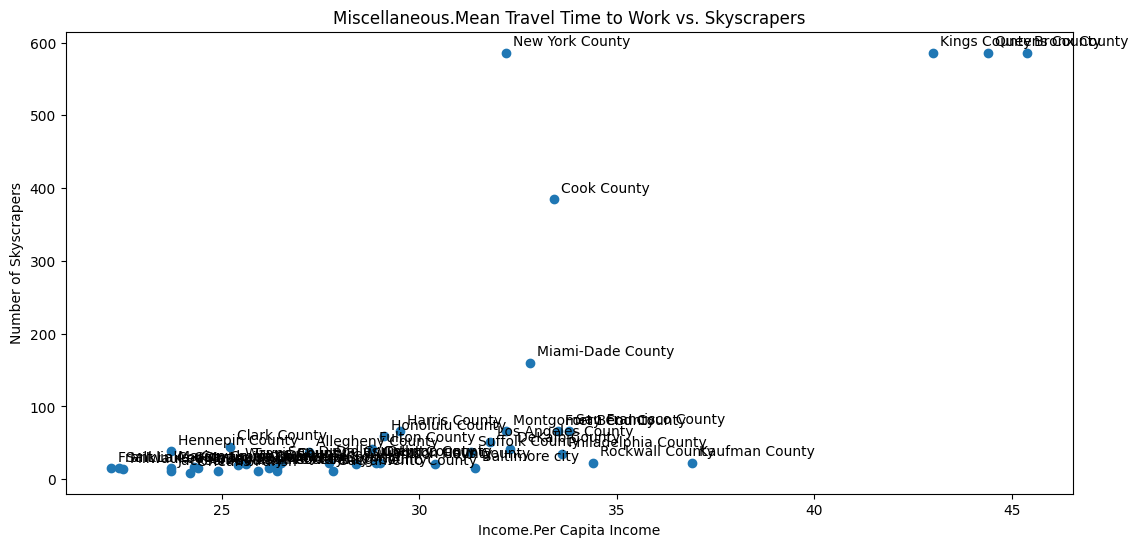

In [29]:
fig, ax = plt.subplots(figsize=(13, 6))

x = county_with_sky['Miscellaneous.Mean Travel Time to Work']
y = county_with_sky['Skyscrapers']
ax.scatter(x, y)
ax.set_title('Miscellaneous.Mean Travel Time to Work vs. Skyscrapers')
ax.set_xlabel('Income.Per Capita Income')
ax.set_ylabel('Number of Skyscrapers')
for i, row in county_with_sky.iterrows():
    county = row['County']
    x = row['Miscellaneous.Mean Travel Time to Work']
    y = row['Skyscrapers']
    ax.annotate(county, xy=(x, y), xytext=(5, 5), textcoords='offset points')
    
plt.show()

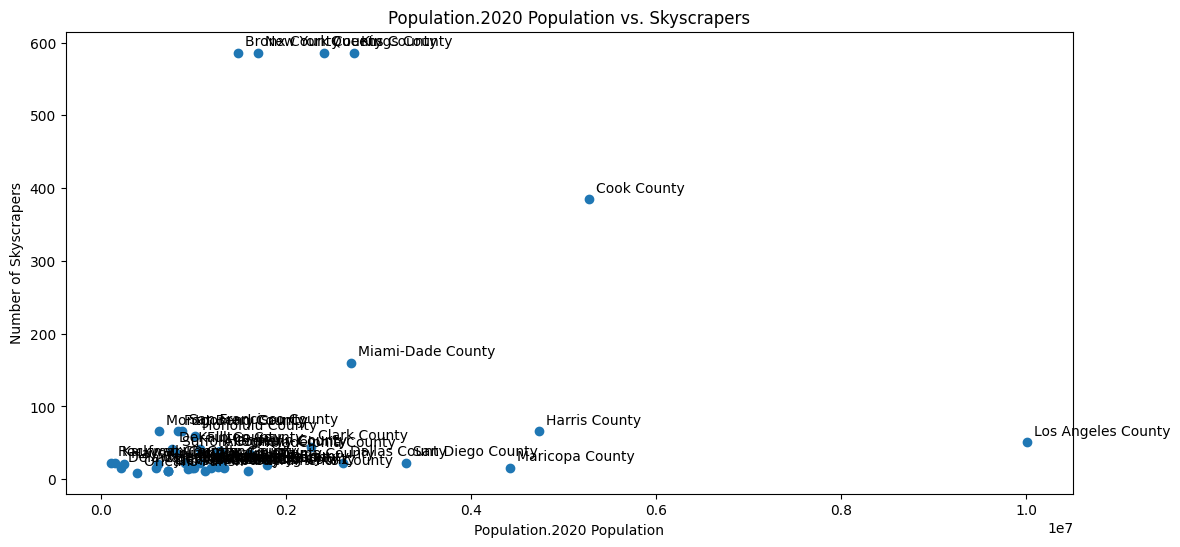

In [30]:
fig, ax = plt.subplots(figsize=(13, 6))

x = county_with_sky['Population.2020 Population']
y = county_with_sky['Skyscrapers']
ax.scatter(x, y)
ax.set_title('Population.2020 Population vs. Skyscrapers')
ax.set_xlabel('Population.2020 Population')
ax.set_ylabel('Number of Skyscrapers')
for i, row in county_with_sky.iterrows():
    county = row['County']
    x = row['Population.2020 Population']
    y = row['Skyscrapers']
    ax.annotate(county, xy=(x, y), xytext=(5, 5), textcoords='offset points')
    
plt.show()

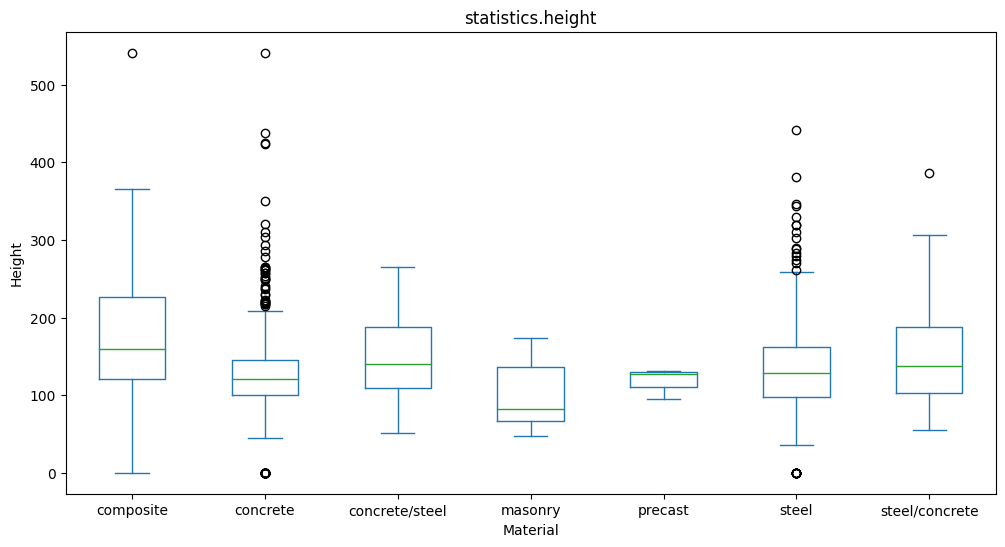

In [33]:
fig, ax = plt.subplots(figsize=(12, 6))
sky.plot(column='statistics.height', by='material',ax=ax, kind='box')
ax.set_xlabel('Material')
ax.set_ylabel('Height')
plt.show()